# Advanced Classification Day 1 - Exercises

## Exercise 1

#### Question 1 
##### Load libraries that are used in this module


In [2]:
main_dir = '/Users/datasociety/Desktop/af-werx'
data_dir = main_dir + "/data"
plot_dir = main_dir + "/plots"

In [3]:
import os
import pickle
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from textwrap import wrap
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import tree
from sklearn.metrics import accuracy_score

# New today - random forest and boosting packages
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from matplotlib.legend_handler import HandlerLine2D

#### Question 2
##### Set `main_dir` to the location of your `af-werx` folder.
##### Make `data_dir` and `plot_dir` from the `main_dir` and concatenate remainder of the path to data directory.

In [4]:
# Set working directory.
os.chdir(data_dir)
# Check working directory.
print(os.getcwd())

/Users/datasociety/Desktop/af-werx/data


#### Question 3
##### Set the working directory to `data_dir`.
##### Check if the working directory is updated to `data_dir`.


In [5]:
print('see above')

see above


#### Question 4
##### Load the clean pickled dataset `chicago_no_hc` and save as `census`.

In [6]:
census = pickle.load(open('chicago_census.sav', 'rb'))

#### Question 5
##### Select the predictors by dropping variable `income` and save the result to a dataframe `X_ex`.
##### Save the target variable `income` column to `y_ex` variable.
##### Set seed as 1.
##### Split the data into train and test sets and save respective variables to `X_train_ex`, `X_test_ex`, `y_train_ex`, `y_test_ex`.


In [7]:
def df_target_split(df, target, s = 2, ts = .3):
    """"""
    # Separate target from data.
    ex_y = np.array(df[f'{target}'])
    # Split the predictors from data.
    ex_x = df.drop(f'{target}', axis = 1)

    # Set the seed.
    np.random.seed(s)
    
    # Split data into training and test set
    ex_X_train, ex_X_test, ex_y_train, ex_y_test = train_test_split(ex_x, ex_y, test_size = ts)
    
    return ex_X_train, ex_X_test, ex_y_train, ex_y_test

In [8]:
ex_X_train, ex_X_test, ex_y_train, ex_y_test = df_target_split(census, 'income', 1)

#### Question 6
##### Create a random forest classifier and save it to `forest_ex` variable.
##### Set random state to 1, number of estimators to 100 and `gini` as the criterion in the model.
##### Fit the classifier to our training data.

In [9]:
# define function to optimize model
def model_random_forest(df, target, params):

    # call function to split train and test data, specify income
    X_train, X_test, Y_train, Y_test = df_target_split(df, target, 1)
    
        
    # pass and unpack params dictionary as specified parameter
    forest = RandomForestClassifier(**params)
    
    # fit data
    forest.fit(X_train, Y_train)
    print(forest)
    # predict
    y_pred = forest.predict(X_test)
    print(y_pred[0:5,])
    # return predictions.
    return y_pred, Y_test, forest

In [10]:
params = {'criterion' : 'gini',
          'n_estimators' : 100,
          'random_state' : 1}

In [11]:
ex_y_predict_forest, ex_y_test = model_random_forest(census, 'income', params)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=1, verbose=0, warm_start=False)
[0 0 0 1 1]


ValueError: too many values to unpack (expected 2)

#### Question 7
##### Predict on the test data and print the first 5 predictions on the test data.


In [12]:
ex_y_predict_forest, ex_y_test, ex_forest = model_random_forest(census, 'income', params)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=1, verbose=0, warm_start=False)
[0 0 0 1 1]


#### Question 8
##### Print the confusion matrix and save it as `conf_matrix_forest_ex`.
##### Print the accuracy score as `accuracy_forest_ex`.
##### Compute the accuracy on the training data.

In [13]:
def plt_cm(y_test, y_predict):
    
    #Take a look at test data confusion matrix and get accuracy
    conf_matrix = metrics.confusion_matrix(y_test, y_predict)
    accuracy = metrics.accuracy_score(y_test, y_predict)
    
    # make pretty and plot
    plt.clf()
    plt.imshow(conf_matrix, 
               interpolation='nearest', 
               cmap=plt.cm.Wistia)
    classNames = ['Negative','Positive']
    plt.title('Confusion Matrix - Test Data')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    tick_marks = np.arange(len(classNames))
    plt.xticks(tick_marks, classNames, rotation=45)
    plt.yticks(tick_marks, classNames)
    s = [['TN','FP'], ['FN', 'TP']]
    for i in range(2):
        for j in range(2):
            plt.text(j,i, str(s[i][j]) + " = " + str(conf_matrix[i][j]))
    plt.show()
    # print accuracy
    print("Accuracy for the model on test data: ", accuracy)
    return accuracy

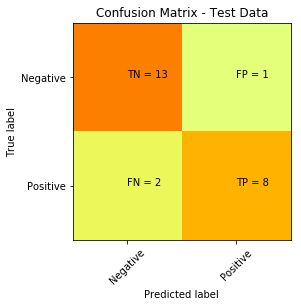

Accuracy for the model on test data:  0.875


In [14]:
accuracy_forest_ex = plt_cm(ex_y_test, ex_y_predict_forest)

#### Question 9
##### Load the pickled dataframe `ex_model_final_tree.sav` we created in the last class and save as `ex_model_final_rf_gbm`.
##### Append the accuracy `accuracy_forest_ex` obtained above to the dataframe.

In [15]:
ex_model_final_rf_gbm = pickle.load(open('ex_model_final.sav', 'rb'))

In [16]:
def update_model_score(model_df, model_accuracy, m_name):
    model_df = model_df.append(
    {'metrics' : "accuracy" ,
     'values' : round(model_accuracy,4),
     'model': m_name
    },
    ignore_index = True
    )
    
    print(model_df)
    return model_df

In [17]:
ex_model_final_rf_gbm = update_model_score(ex_model_final_rf_gbm, accuracy_forest_ex, 'random forest')

    metrics  values                       model
0  accuracy  0.8333                       knn_5
1  accuracy  0.9359            knn_GridSearchCV
2  accuracy  0.9583                      knn_27
3  accuracy  1.0000                    logistic
4  accuracy  1.0000        logistic_withdummies
5  accuracy  1.0000              logistic_tuned
6  accuracy  0.9167          tree_simple_subset
7  accuracy  0.9583     full_tree_simple_subset
8  accuracy  0.9583  full_tree_optimized_subset
9  accuracy  0.8750               random forest


#### Question 10
##### Print the feature importance graph and print the top 10 important features in our random forest model.


In [18]:
def plot_importance(df, target, f_model):
    
    df_features = df.drop(f'{target}', axis = 1)
    features = df_features.columns
    importances = f_model.feature_importances_
    indices = np.argsort(importances)[::-1]
    top_indices = indices[0:10][::-1]

    plt.figure(1)
    plt.title('Feature Importance')
    plt.barh(range(len(top_indices)), 
             importances[top_indices], 
             color = 'b', 
             align = 'center')
    labels = features[top_indices]
    plt.yticks(range(len(top_indices)), 
               labels)
    plt.xlabel('Relative Importance')

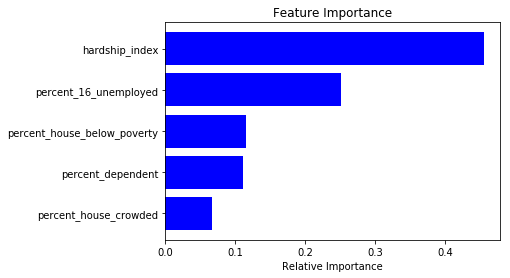

In [19]:
plot_importance(census, 'income', ex_forest)

#### Question 11
##### Pickle your random forest model `forest_ex` for use in the next class.
##### Save as `ex_model_forest.sav`.

In [20]:
pickle.dump(forest_ex, open("ex_model_forest.sav","wb" ))

NameError: name 'forest_ex' is not defined

## Exercise 2

#### Question 1

##### Create a gradient boosting classifier as `gbm_ex` with number of estimators set to 100, learning rate set to 1, max depth set to 1, and random state set to 1.
##### Fit the model to our training data.


In [21]:
# define function to gradient boosting model 
def model_gradient_boosting(df, target, params):

    # call function to split train and test data, specify income
    X_train, X_test, Y_train, Y_test = df_target_split(df, target, 1)
    
        
    # pass and unpack params dictionary as specified parameter
    gbm = GradientBoostingClassifier(**params)
    
    # fit data
    gbm.fit(X_train, Y_train)
    print(gbm)
    # predict
    y_pred = gbm.predict(X_test)
    print(y_pred[0:5,])
    # return predictions.
    return y_pred, Y_test, gbm

In [22]:
params_g = {'n_estimators' : 100, 
            'learning_rate' : 1, 
            'max_depth' : 1, 
            'random_state' : 1}

#### Question 2
##### Predict on the test data using our gbm classifier.
##### Print the first 5 predicted values.


In [23]:
ex_y_predict_gbm, ex_y_test_gbm, gbm_ex = model_gradient_boosting(census, 'income', params_g)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=1, loss='deviance', max_depth=1,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              n_iter_no_change=None, presort='auto', random_state=1,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)
[0 0 0 1 1]


#### Question 3
##### Print the confusion matrix and accuracy score on the test data.
##### Print the training accuracy of gbm model.


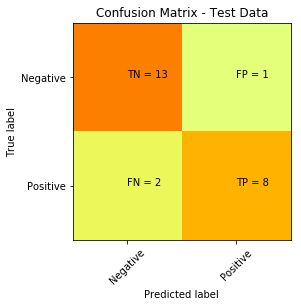

Accuracy for the model on test data:  0.875


In [24]:
gbm_accuracy = plt_cm(ex_y_test_gbm, ex_y_predict_gbm)

#### Question 4
##### Print the feature importance graph and print top 10 important predictors.


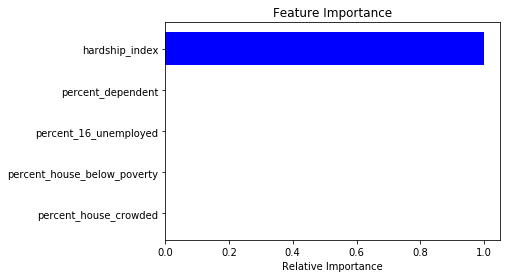

In [25]:
plot_importance(census, 'income', gbm_ex)

#### Question 5 
##### Add the gbm accuracy score in the dataset. 
##### Remember to pickle the dataframe as `ex_model_final_rf_gbm.sav` for later use.

In [26]:
ex_model_final_rf_gbm = update_model_score(ex_model_final_rf_gbm, gbm_accuracy, 'gradient_booster')

     metrics  values                       model
0   accuracy  0.8333                       knn_5
1   accuracy  0.9359            knn_GridSearchCV
2   accuracy  0.9583                      knn_27
3   accuracy  1.0000                    logistic
4   accuracy  1.0000        logistic_withdummies
5   accuracy  1.0000              logistic_tuned
6   accuracy  0.9167          tree_simple_subset
7   accuracy  0.9583     full_tree_simple_subset
8   accuracy  0.9583  full_tree_optimized_subset
9   accuracy  0.8750               random forest
10  accuracy  0.8750            gradient_booster


In [27]:
pickle.dump(ex_model_final_rf_gbm, open('ex_model_final.sav', 'wb'))

In [28]:
# define function for plotting
def plot_results(optimizer, train_results, test_results, o_param):
    line1, = plt.plot(optimizer,
                      train_results, 
                      'b', 
                      label = "Train accuracy")
    line2, = plt.plot(optimizer, 
                      test_results, 
                      'r', 
                      label = "Test accuracy")
    plt.legend(handler_map={line1: HandlerLine2D(numpoints = 2)})
    plt.ylabel('Accuracy')
    plt.xlabel(o_param)
    plt.show()

In [29]:
# Define function that will determine the optimal number for each parameter.
def optimal_parameter(values,test_results):
    best_test_value = max(test_results)
    best_test_index = test_results.index(best_test_value)
    ex_best_value = values[best_test_index]
    return(ex_best_value)

In [30]:
# define function to optimize model
def model_optimizer(df, target, model, optimizer, o_param):
    # intiate empty lists
    train_results = []
    test_results = []
    
    # call function to split train and test data, specify income
    X_train, X_test, Y_train, Y_test = df_target_split(df, target)
    
    for i in optimizer:
        
        # pass o_param as dictionary key and i as value
        params = { o_param : i}
        
        # pass and unpack params dictionary as specified parameter
        model = model.set_params(**params)
        
        # fit data
        model.fit(X_train, Y_train)
        train_pred = model.predict(X_train)
        acc_train = accuracy_score(Y_train, train_pred)

        # Add AUC score to previous train results
        train_results.append(acc_train)
        y_pred = model.predict(X_test)
        acc_test = accuracy_score(Y_test, y_pred)

        # Add AUC score to previous test results
        test_results.append(acc_test)

    #plot the results
    plot_results(optimizer, train_results, test_results, o_param)

    # return optimal parameter.
    return optimal_parameter(optimizer, test_results)

In [31]:
gbm_o = GradientBoostingClassifier()

In [32]:
rndm_f = RandomForestClassifier()

/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


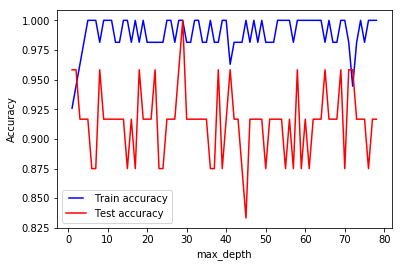

29.0

In [33]:
max_depths = np.linspace(1, census.shape[0], census.shape[0], endpoint = True)
optimal_max_depth = model_optimizer(census, 'income', rndm_f, max_depths, 'max_depth')
optimal_max_depth

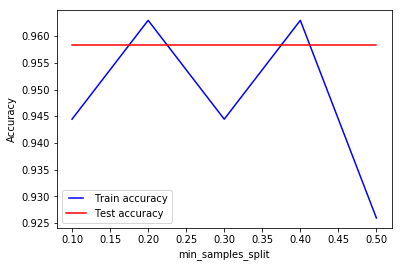

0.1

In [34]:
min_samples_splits = np.linspace(0.1, 0.5, 5, endpoint = True)

optimal_min_samples_split = model_optimizer(census, 'income', rndm_f, min_samples_splits, 'min_samples_split')
optimal_min_samples_split

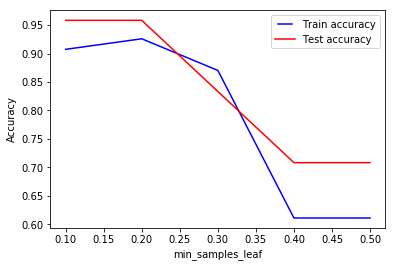

0.1

In [35]:
min_samples_leafs = np.linspace(0.1, 0.5, 5, endpoint = True)

optimal_min_samples_leafs = model_optimizer(census, 'income', rndm_f, min_samples_leafs, 'min_samples_leaf')
optimal_min_samples_leafs

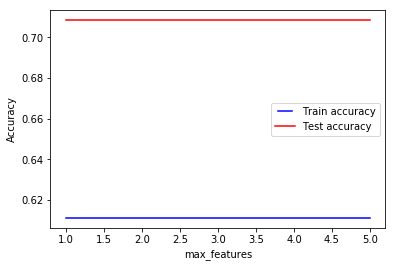

1

In [142]:
max_features = list(range(1, census.shape[1]))
optimal_max_features = model_optimizer(census, 'income', rndm_f, max_features, 'max_features')
optimal_max_features

In [143]:
print("The optimal max depth is:", optimal_max_depth)
print("The optimal min samples split is:", optimal_min_samples_split)
print("The optimal min samples leaf is:", optimal_min_samples_leafs)
print("The optimal max features is:", optimal_max_features)

The optimal max depth is: 29.0
The optimal min samples split is: 0.1
The optimal min samples leaf is: 0.1
The optimal max features is: 1


In [145]:
X_train, X_test, Y_train, Y_test = df_target_split(census, 'income')
# Set the seed.
np.random.seed(1)

# Implement the decision tree on X_train.
gbm_optimized = RandomForestClassifier(max_depth = optimal_max_depth,
                                            min_samples_split = optimal_min_samples_split,
                                            min_samples_leaf = optimal_min_samples_leafs,
                                            max_features = optimal_max_features)

# We can now see our optimized features where before they were just default:
print(gbm_optimized)

gbm_optimized_fit = gbm_optimized.fit(X_train, Y_train)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=29.0, max_features=1, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=0.1, min_samples_split=0.1,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)


/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [146]:
# Predict on X_test.
ex_y_predict_optimized = gbm_optimized_fit.predict(X_test)
 
# Get the accuracy score.
ex_acc_score_tree_optimized = accuracy_score(Y_test, ex_y_predict_optimized)

print(ex_acc_score_tree_optimized)

0.9583333333333334
